In [2]:
import numpy as np

In [3]:
N = 100
D = 2

In [4]:
X = np.random.randn(N, D)
ones = np.ones((N, 1), dtype = 'uint8')

#originally data from randn is centred at 0 with variance of 1 since it comes from normal distribution
X[:50, :] = X[:50, :] - 2*np.ones((50, D))  #data is centred at -2
X[50:, :] = X[50:, :] + 2*np.ones((50, D))   #data is centred at +2

print(X[:50].mean()) 
print(X[50:].mean())

T = np.array([0] * 50 + [1] * 50)
print('Taregt matrix : ', T)

Xb = np.concatenate((X, ones), axis = 1)

-2.049983144394414
1.8289025942137411
Taregt matrix :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
def sigmoid(a) :
    return 1 / (1 + np.exp(-a))

def cross_entropy(T, Y) :
    E = 0
    for i in range(len(T)) :
        if T[i] == 1 :
            E -= np.log(Y[i])
        else :
            E -= np.log(1 - Y[i])
    return E
    

In [6]:
#randoly initalizing the weights
w = np.random.rand(D + 1)

#calculate the model output 
z = Xb.dot(w)

#apply the activation function
Y = sigmoid(z)

print(cross_entropy(T, Y))

25.660646874400722


In [7]:
#applying the closed form solution
w = np.array([4, 4, 0])

z = Xb.dot(w)
Y = sigmoid(z)

print(cross_entropy(T, Y))

0.5450486608768763


In [8]:
import matplotlib.pyplot as plt

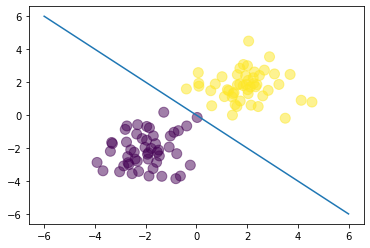

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=T, s = 100, alpha = 0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis  #line with neg slope since y/x < 0 =>neg
plt.plot(x_axis, y_axis)